# Series temporáis

 - Dados coletados em um intervalo de tempo regular, exemplo: mensalmente
 - Ordenado por intervalo de tempo
 - Supõe-se que os intervalos de tempo sejam dependentes entre si
 - Usado para prever dados em um intervalo de tempo
 - Dividido em 
   - Estacionárias: flutuam em torno de uma mesma média e variância
   - Não-estacionárias
 - Podem ser
   - Estocásticas: aqui os dados são definido por um fator aleátorio nos dados, que não pode ser explicado + formula
   - Determinísticas: explicadas através de uma formula/função
 - Componentes
   - Tendência
   - Sazonalidade
   - Aleatoriedade
 - Ciclos
   - São variações que não podem ser relacionadas com o intervalo de tempo
   - As consequências do ciclo podem ser explicados
   - Exemplo: crises econômicas, desastres naturais, etcs...

In [4]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot  as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

### Explorando

In [5]:
base = pandas.read_csv("data/AirPassengers.csv")
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
dateParse = lambda dates: pandas.datetime.strptime(dates, '%Y-%m')
base = pandas.read_csv("data/AirPassengers.csv", parse_dates = ["Month"],
                       index_col = "Month", date_parser=dateParse)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
base.dtypes

#Passengers    int64
dtype: object

In [9]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
serie = base['#Passengers']
serie[:6]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [13]:
serie[1]

118

In [14]:
serie['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [15]:
serie['1949-02-01']

118

In [16]:
serie[datetime(1949,2,1)]

118

In [17]:
serie['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
serie[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [19]:
serie['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [20]:
serie.index.max()

Timestamp('1960-12-01 00:00:00')

In [21]:
serie.index.min()

Timestamp('1949-01-01 00:00:00')

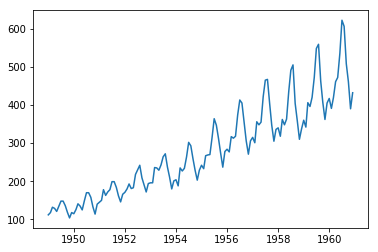

In [22]:
plt.plot(serie)

In [23]:
serie_ano = serie.groupby([lambda x: x.year]).sum()
serie_ano

1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: #Passengers, dtype: int64

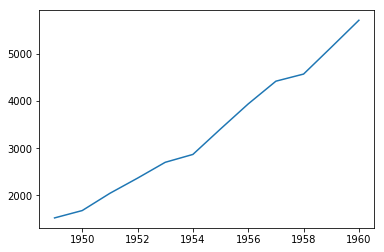

In [24]:
plt.plot(serie_ano)

In [25]:
serie_mes = serie.groupby([lambda x: x.month]).sum()
serie_mes

1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

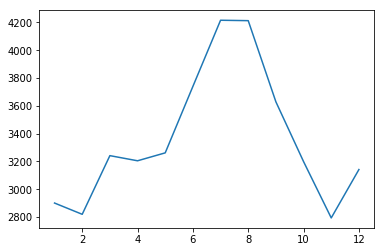

In [26]:
plt.plot(serie_mes)

In [29]:
serie_datas = serie['1960-01-01': '1960-12-01']
serie_datas

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

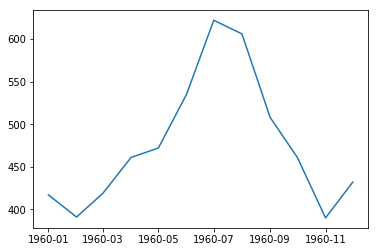

In [30]:
plt.plot(serie_datas)